# What are the most demanded skills for the top 3 most popular data roles?

### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings

In [6]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_US = df[df['job_country'] == 'United States']

In [8]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [9]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')   # Or set as_index=False directly within the groupby(call)

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [19]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

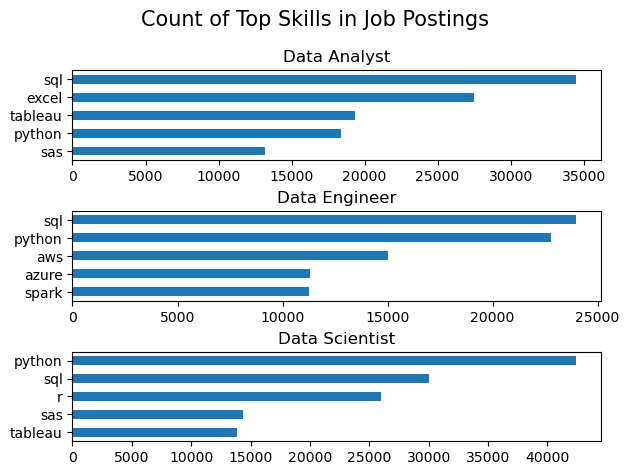

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
    ax[i].set_ylabel('') 
    ax[i].invert_yaxis()
    

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

### What is the likelihood of skills requested in US job postings?

In [ ]:
# Get the total job postings per role 
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [ ]:
# To calculate skill percentage
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] =  100 * df_skill_perc['skill_count'] /df_skill_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


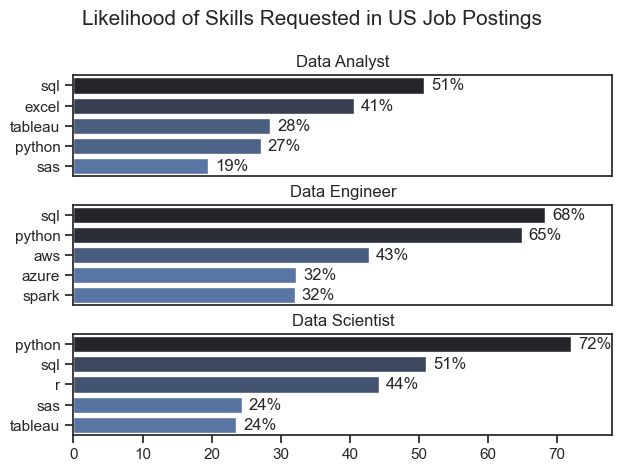

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], legend=False, hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 78)
    
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) -1:
        ax[i].set_xticks([])  

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [10]:
Ujob_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer' ]

Ujob_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer']

### Coount in a 2 by 2 format

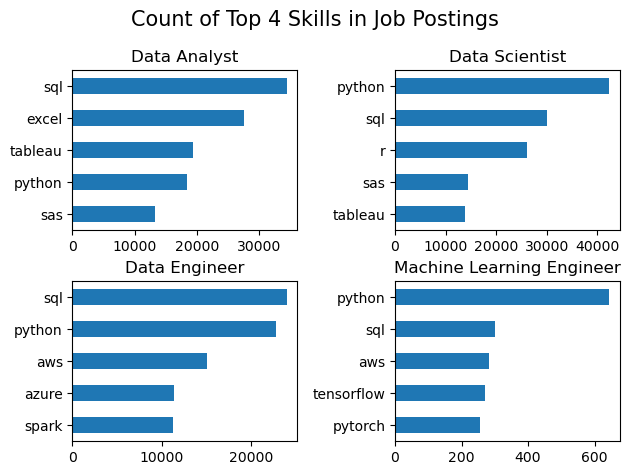

In [16]:
fig, ax = plt.subplots(2, 2)
ax = ax.flatten()

for i, Ujob_title in enumerate(Ujob_titles):
    df_Uplot = df_skills_count[df_skills_count['job_title_short'] == Ujob_title].head(5)
    df_Uplot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=Ujob_title, legend=False)
    ax[i].set_ylabel('') 
    ax[i].invert_yaxis()
    

fig.suptitle('Count of Top 4 Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

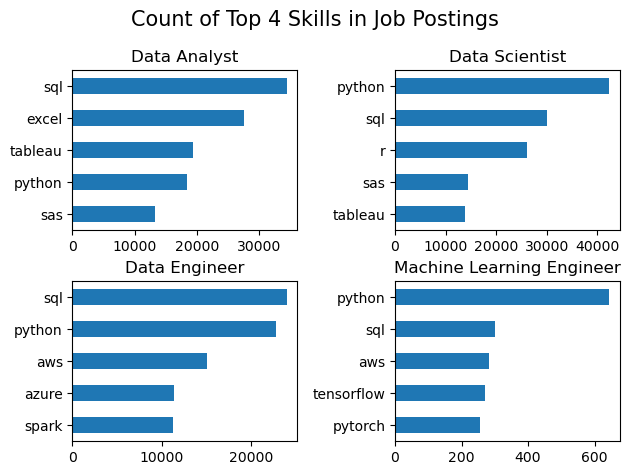

In [18]:
fig, ax = plt.subplots(2, 2)

for i, Ujob_title in enumerate(Ujob_titles):
    row = i // 2
    col = i % 2
    df_Uplot = df_skills_count[df_skills_count['job_title_short'] == Ujob_title].head(5)
    df_Uplot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[row, col], title=Ujob_title, legend=False)
    ax[row, col].set_ylabel('') 
    ax[row, col].invert_yaxis()
    

fig.suptitle('Count of Top 4 Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()